<img src="https://3k7by215ywuf340yi3alsfso-wpengine.netdna-ssl.com/wp-content/uploads/sites/5/2014/09/00_ED_shutterstock_83821315_Rankings_800x.jpg">

#### TASKS TO PERFORM IN THIS NOTEBOOK:

1.CORRELATION BETWEEN OUR NEWLY FORMED FEATURE(PERFORMANCE_SCORE) & OTHER PARAMETERS

2.DISTRIBUTION OF PERFORMANCE_SCORE.

3.PASS & FAIL CALCULATION BASED ON PERFORMANCE_SCORE.

#### DATA COLLECTION

In [93]:
import pandas as pd
df=pd.read_csv("StudentsPerformance.csv")

#### DATA EXPLORATION

In [94]:
df.shape

(1000, 8)

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
df.isnull().mean()

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [98]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### FEATURE ENGG

In [99]:
def counting_values(df,variable):
    a=df[variable].value_counts()
    return a

In [100]:
a=df.iloc[0:0,:-3].columns
for i in a:
    print(counting_values(df,i),end="\n\n\n\n")

female    518
male      482
Name: gender, dtype: int64



group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64



some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64



standard        645
free/reduced    355
Name: lunch, dtype: int64



none         642
completed    358
Name: test preparation course, dtype: int64





In [101]:
df["performance_score"]=(df["math score"]+df["reading score"]+df["writing score"])/3

In [102]:
df.drop(["math score","reading score","writing score"],axis=1,inplace=True)

In [103]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,performance_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [121]:
#we created our own feature performance_score by combining the performance of three subjects.

In [104]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [122]:
#we are performing ordinal number encoding to convert strings to integers.

In [106]:
x={"group A":1,"group B":2,"group C":3,"group D":4,"group E":5}

In [107]:
df["race_ranking"]=df["race/ethnicity"].map(x)

In [108]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,performance_score,race_ranking
0,female,group B,bachelor's degree,standard,none,72.666667,2
1,female,group C,some college,standard,completed,82.333333,3
2,female,group B,master's degree,standard,none,92.666667,2
3,male,group A,associate's degree,free/reduced,none,49.333333,1
4,male,group C,some college,standard,none,76.333333,3


In [109]:
y={"master's degree":1,"bachelor's degree":2,"associate's degree":3,"some college":4,"high school":5,"some high school":6}

In [110]:
df["education_ranking"]=df["parental level of education"].map(y)

In [111]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,performance_score,race_ranking,education_ranking
0,female,group B,bachelor's degree,standard,none,72.666667,2,2
1,female,group C,some college,standard,completed,82.333333,3,4
2,female,group B,master's degree,standard,none,92.666667,2,1
3,male,group A,associate's degree,free/reduced,none,49.333333,1,3
4,male,group C,some college,standard,none,76.333333,3,4


In [112]:
df.drop(["race/ethnicity","parental level of education"],axis=1,inplace=True)

In [113]:
df=pd.get_dummies(df,drop_first=True)

In [114]:
df.head()

,performance_score,race_ranking,education_ranking,gender_male,lunch_standard,test preparation course_none
0,72.666667,2,2,0,1,1
1,82.333333,3,4,0,1,0
2,92.666667,2,1,0,1,1
3,49.333333,1,3,1,0,1
4,76.333333,3,4,1,1,1


In [123]:
#Finally we got our desired dataset.

TASKS:

1.Correlation:

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

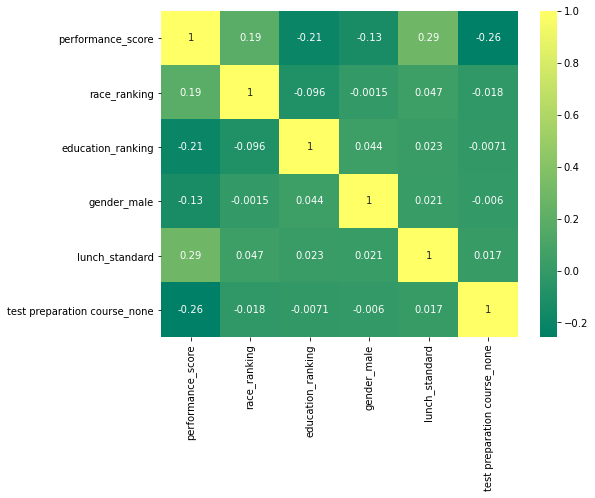

In [116]:
#checking correlation amongst our parametrers
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True,cmap="summer")

By observing our heatmap(correlation) we can come to the some strange conclusions:

1.As the class of Race & lunch standard goes higher,performance_score also goes up.

2.With the decrease of parent's education qualification,student's performance goes down.

3.Female candidates performed a bit better than male.

4.Those students who has gone through test preparation performed better.

2.Distribution:

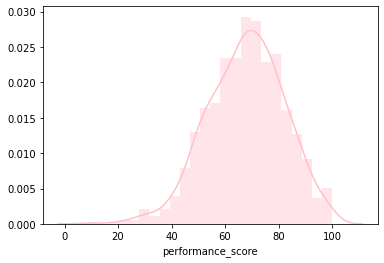

In [117]:
#checking distribution of performance score
sns.distplot(df["performance_score"],color='pink')

We can see that our distribution is almost normally distributed.

3.Pass & Fail Calculation:

In [118]:
#pass & fail calculatiion
passmarks=40
import numpy as np
df["performance_score"]=np.where(df["performance_score"]<passmarks,"Fail","Pass")

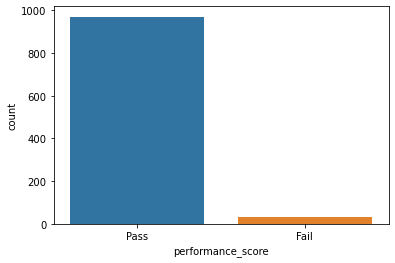

In [119]:
sns.countplot(x='performance_score',data=df)

In [120]:
df['performance_score'].value_counts()

Pass    970
Fail     30
Name: performance_score, dtype: int64

Based on our performance score : 970 have passed & 30 have failed.